<a href="https://colab.research.google.com/github/AlejandroBeltranA/OCR-PDF-to-TXT/blob/master/OCR_pdf_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convert pdf to readable format for python NLP. 

First, mount google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Change the working directory to a folder in your drive. This is important because the new build of anaconda and linux will save to this folder. 

In [ ]:
%cd /content/drive/My Drive/Data/OCVED/Sedena
!ls


/content/drive/My Drive/Data/OCVED/Sedena
Anaconda3-5.1.0-Linux-x86_64.sh  extract  pdf  txt  txt_spa


Clean install of python below. 

In [ ]:

!sudo apt-get install -y python python-dev python-pip build-essential swig git libpulse-dev




Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
python is already the newest version (2.7.15~rc1-1).
python-dev is already the newest version (2.7.15~rc1-1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libpulse-mainloop-glib0 libpython-all-dev python-all python-all-dev
  python-asn1crypto python-cffi-backend python-crypto python-cryptography
  python-dbus python-enum34 python-gi python-idna python-ipaddress
  python-keyring python-keyrings.alt python-pip-whl python-pkg-resources
  python-secretstorage python-setuptools python-six python-wheel python-xdg
  swig3.0
Suggested packages:
  python-crypto-doc python-cryptography-doc python-cryptography-vectors
  python-dbus-dbg pyt

Now install a clean version of anaconda for linux into the virtual machine. 

In [ ]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh


#!wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh




--2020-01-28 19:00:34--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y --prefix /usr/local -c conda-forge poppler

PREFIX=/usr/local
^C
/bin/bash: conda: command not found


Poppler is the reason we are creating this virtual enviornment in this virtual machine using a virtual version of developer python. 

Make sure the system is calling the location of where the python packages are being saved to. 

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages/')
#!conda install -c conda-forge poppler

Traceback (most recent call last):
  File "/usr/local/bin/conda", line 7, in <module>
    from conda.cli import main
ModuleNotFoundError: No module named 'conda'


tesseract is the software that does the OCR. 

In [ ]:
!sudo apt install tesseract-ocr


Below are the packages required. We are using textract from Amazon to do the conversion in series. Textract is flexible and allows for ocr in Spanish. 

In [ ]:
!python -m pip install PyPDF2
!python -m  pip install textract
!python -m pip install nltk
!python -m pip install pytesseract
!python -m pip install pdftoppm
!python -m pip install pdf2image

ERROR: Could not find a version that satisfies the requirement pdftoppm (from versions: none)
ERROR: No matching distribution found for pdftoppm


Confirm the system path is at the same location where packages are being saved. 

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages/')
import PyPDF2 
import textract
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm_notebook as tqdm
import glob
import os
import pandas as pd
import zipfile

# OCRing

I upload files in Zip because colab takes too long to read individual files. 

In [ ]:
for filename in tqdm(glob.glob("pdf/*.zip")):
    zip_ref = zipfile.ZipFile(filename, 'r')
    zip_ref.extractall('pdf/') #destination folder
    zip_ref.close()
    


extract the files to a folder. then confirm it has the total number of desired files. 

In [ ]:
total = len(glob.glob('pdf/*/*.pdf'))
print (total)

1517


I was missing some packages and this command helps get everything that the updated textract needs for converting the files. 

In [ ]:
!apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr \
flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig libpulse-dev
!pip install textract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
python-dev is already the newest version (2.7.15~rc1-1).
swig is already the newest version (3.0.12-1).
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
libpulse-dev is already the newest version (1:11.1-1ubuntu7.4).
libxml2-dev is already the newest version (2.9.4+dfsg1-6.1ubuntu1.2).
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libid3tag0 libijs-0.35 libjbig2dec0
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base l

Need to install the tesseract version in Spanish. 

In [ ]:
!sudo apt-get install tesseract-ocr-spa  #for spanish


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tesseract-ocr-spa
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 951 kB of archives.
After this operation, 2,309 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-spa all 4.00~git24-0e00fe6-1.2 [951 kB]
Fetched 951 kB in 0s (6,726 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to

The below loop reads each file in the folder, converts them into text using the tesseract OCR in spanish. We save the text as an object in python, convert it to string. Then save the file in new destination. I also add a command for generating CSV because csv's are easier to read in in the future. 

In [ ]:


df = pd.DataFrame()
for file in tqdm(glob.glob('pdf/*/*.pdf')):
  text = textract.process(file, method='tesseract', encoding ='utf-8', language = 'spa')
  content = str(text, encoding='utf-8')
  filename = os.path.basename(file)
  filename = filename.replace('pdf', 'txt')
  file_name = 'txt_spa/' + filename
  df = df.append({"file_id" : filename, "content" : content}, ignore_index=True)
  with open (file_name, 'w', encoding = 'utf-8') as f:
    f.write(content)

      


In [ ]:
df.to_csv('Sedena_2000-2006.csv', index=False, encoding='utf-8')
df.head()


content                 file_id
0  Swap pr "n\n\nDEA\nAODAL\n\nOIRECCION OENERAL ...  20050622001_SEDENA.txt
1  DIRECCIDA GENERAL DE\nCOMUNICACIÓN SOCIAL.\n\n...  20050622002_SEDENA.txt
2  AN ht r-A\n\nnaco\n\nDIRECCION. GENERAL PE\nCO...  20050623001_SEDENA.txt
3  DIRECCION GENERAL DE\nCOMUNICACIÓN SOCIAL\n\nC...  20050624002_SEDENA.txt
4  co | t IN\nPOB o o\n\nvacio,\n\nDIRECCION GENE...  20050625001_SEDENA.txt

# Word Cloud

Here I make a word cloud for the OCR text.

In [ ]:


import nltk
nltk.download('stopwords')
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("spanish"))
##Creating a list of custom stopwords
new_words = ["daily", "newspaper", "reforma", "publication", "universal", "El", "La", "mas", "En", "Publication", "News", "si", "Reforma",
            "Daily", "Newspaper", "ser", "Los", "dijo", "tambien" , "anos", "parte", "UNIVERSAL", "solo", "caso", "dos", "estan", "Por", "ayer",
            "pues", "ayer", "puede", "De", "asi", "hacer", "tres", "hace", "·", "sido", "hoy", "mismo", "hizo", "Pero", "Para", "Sin", "sera", "Si",
            "aunque", "habia", "Es", "cada", "luego", "bien", "sino", "ahora", "bien", "vez", "dia", "news"]
stop_words = stop_words.union(new_words)


In [ ]:
import re
dataset = df
corpus = []
for i in dataset.itertuples():
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', i.content)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    #text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    #ps=PorterStemmer()
    #Lemmatisation
    #lem = WordNetLemmatizer()
    #text = [lem.lemmatize(word) for word in text if not word in  
    #        stop_words] 
    text = " ".join(text)
    corpus.append(text)
    
corpus

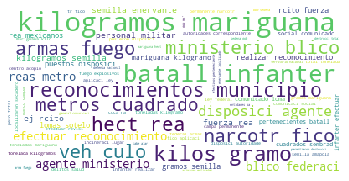

In [ ]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("Sedena_word_cloud.png", dpi=900)